In [1]:
from regression_tree import *
from random_forest import RandomForest
from utils import *
from visualisation import *
from RandomForestLLM import RandomForestLLM

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import pickle
import pandas as pd

In [2]:
data1 = pd.read_csv('../data_processed/mpg_data.csv')

pickle_file = open('../data_processed/mpg_dict.pkl', 'rb')
feature_structure1 = pickle.load(pickle_file)
pickle_file.close()

Time comparison of models:
- performance for n_trees
- performance for max_depth

n_trees comparison

In [3]:
# setup classifiers to test - comparison over time
tree_numbers = range(6, 12)
rfX_n_tree = [ RandomForest(n_trees=t) for t in tree_numbers]
skRF_n_tree = [ RandomForestRegressor(n_estimators=t) for t in tree_numbers]
skKNN_n_tree = [ KNeighborsRegressor(n_neighbors=t) for t in tree_numbers]
rfLLM_n_tree = [ RandomForestLLM(n_trees=t) for t in tree_numbers]


tree_methods = rfX_n_tree + skRF_n_tree + rfLLM_n_tree
all_models_n_tree = rfX_n_tree + skRF_n_tree + skKNN_n_tree


In [4]:
res_tree_methods = evaluate_models(data1, feature_structure1, tree_methods)


[<regression_tree.TreeNode object at 0x000002D4354CD400>, <regression_tree.TreeNode object at 0x000002D4356DAEA0>, <regression_tree.TreeNode object at 0x000002D4357010A0>, <regression_tree.TreeNode object at 0x000002D435703530>, <regression_tree.TreeNode object at 0x000002D435711AC0>, <regression_tree.TreeNode object at 0x000002D435713E30>]
[<regression_tree.TreeNode object at 0x000002D435722720>, <regression_tree.TreeNode object at 0x000002D435731160>, <regression_tree.TreeNode object at 0x000002D4357333B0>, <regression_tree.TreeNode object at 0x000002D435741AF0>, <regression_tree.TreeNode object at 0x000002D4357501A0>, <regression_tree.TreeNode object at 0x000002D435752750>]
[<regression_tree.TreeNode object at 0x000002D435760E90>, <regression_tree.TreeNode object at 0x000002D4357638C0>, <regression_tree.TreeNode object at 0x000002D435771B50>, <regression_tree.TreeNode object at 0x000002D435773D40>, <regression_tree.TreeNode object at 0x000002D4357822D0>, <regression_tree.TreeNode ob

UnboundLocalError: cannot access local variable 'metric' where it is not associated with a value

In [5]:
with open('res_mpb_ntrees', 'wb') as f:
    pickle.dump(res_tree_methods, f)

In [ ]:
res_tree_methods = pickle.load(open('res_mpb_ntrees', 'rb'))
visualise_results(res_tree_methods, save=True)

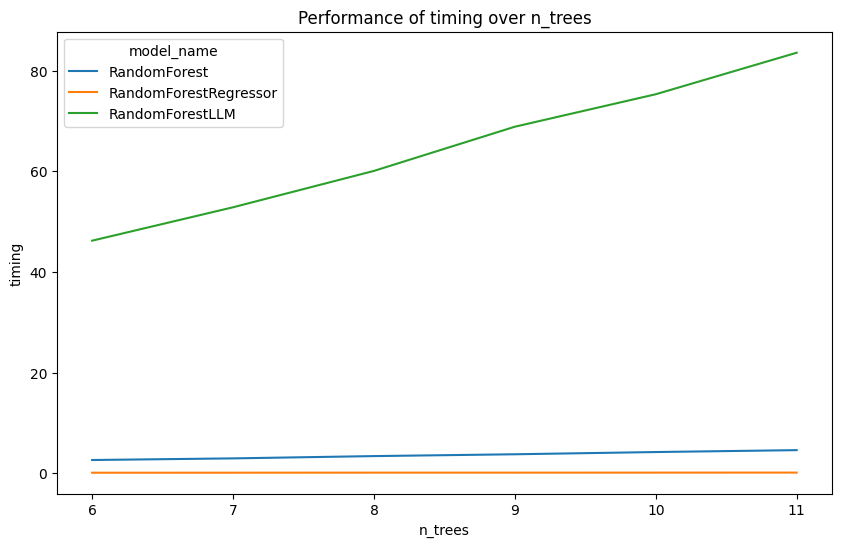

In [13]:
visualise_results(res_tree_methods, metrics='timing' ,save=False)

Performance over max_depth

In [7]:
rfX_max_depth = [ RandomForest(max_depth=t) for t in range(2, 10)]
skRF_max_depth = [ RandomForestRegressor(max_depth=t) for t in range(2, 10)]
rfLLM_max_depth = [ RandomForestLLM(max_depth=t) for t in tree_numbers]

tree_methods = rfX_max_depth + skRF_max_depth + rfLLM_max_depth


In [ ]:
res_tree_methods_maxt = evaluate_models(data1, feature_structure1, tree_methods)

[<regression_tree.TreeNode object at 0x0000012B8F826960>, <regression_tree.TreeNode object at 0x0000012B8FD29340>, <regression_tree.TreeNode object at 0x0000012B91249220>]
[<regression_tree.TreeNode object at 0x0000012B8FD2BDD0>, <regression_tree.TreeNode object at 0x0000012B91249AC0>, <regression_tree.TreeNode object at 0x0000012B91249010>]
[<regression_tree.TreeNode object at 0x0000012B91248410>, <regression_tree.TreeNode object at 0x0000012B912497F0>, <regression_tree.TreeNode object at 0x0000012B9124A5A0>]
[<regression_tree.TreeNode object at 0x0000012B8FD280E0>, <regression_tree.TreeNode object at 0x0000012B9124A930>, <regression_tree.TreeNode object at 0x0000012B91249A90>]
[<regression_tree.TreeNode object at 0x0000012B9124ADE0>, <regression_tree.TreeNode object at 0x0000012B912E00B0>, <regression_tree.TreeNode object at 0x0000012B912E0CE0>]
{'mse': np.float64(22.671879085441873), 'r2': np.float64(0.39191321003244395), 'timing': 0.3150348663330078}
[<regression_tree.TreeNode obje